# K-Prototypes Clustering for Building Peer Group Analysis

## Problem Framing
The global fight against climate change faces a **critical challenge in the built environment**, which accounts for **34% of global energy-related CO₂ emissions** and **32% of final energy consumption** (UN Environment Programme 2025). As sector emissions continue to rise, partly driven by extreme temperatures increasing demand for space cooling (International Energy Agency 2025), it is urgent to find precise ways to make buildings more energy efficient.

The main goal is to measure building energy efficiency more fairly and accurately, with the ultimate objective of creating meaningful, **data-based archetypes (peer groups)** for understanding energy consumption patterns and identifying problematic buildings. Traditional methods often fall short because they compare buildings using simple, static categories or basic formulas like **Multiple Linear Regression (MLR)**. These methods fail to capture the complex, non-linear factors that truly influence a building's energy use, such as its construction type, age, internal systems, and local climate. Consequently, the comparisons are often inaccurate, making it difficult for policymakers and owners to target their investments effectively (Deepki 2023,). For instance, it is illogical to compare a high-energy laboratory to a parking garage or a tropical facility to a temperate one without adjusting for these variables.

To create genuinely meaningful comparisons, this study proposes an **advanced data-driven solution: unsupervised clustering**.

**Methodology:**

1\. **Moving Beyond Bias:** Instead of relying on predefined labels, this approach uses **unsupervised clustering** to allow **"true" peer groups** to emerge naturally from the data, identifying groups of buildings with similar characteristics and energy profiles (Amasyali & El-Gohary 2018). This technique generates **representative building archetypes** to define typical buildings within the overall stock (Deepki 2023,.

2\. **Handling Complex Data:** The chosen tool is the **K-Prototypes algorithm**, which is ideal for the building sector because it can **simultaneously process categorical data** (like usage type or region) **and numerical data** (like size, age, or temperature) (Alrasheed & Mourshed 2024). This capacity to handle mixed data types is crucial for capturing the heterogeneous nature of the building sector.

3\. **Targeted Impact:** By analyzing **Energy Use Intensity (kWh/sqm)** within these defined peer groups, the methodology ensures that benchmarking is done against the most relevant comparison objects, not a vague industry average. This dramatically improves the ability to **identify "efficiency outliers"**---buildings performing significantly worse than their true peers---which allows policymakers and owners to **prioritize highly effective, targeted interventions** (Deepki 2023).

In summary, adopting clustering techniques like K-Prototypes is essential for developing accurate, representative models that address the inherent complexity of diverse building stock (Alrasheed & Mourshed, 2024). This methodological shift from simplified, traditional comparisons to data-informed peer grouping provides a robust framework for identifying energy inefficiencies (Amasyali & El-Gohary, 2018). By pinpointing efficiency outliers within specific archetypes, these insights directly facilitate evidence-based decision-making. This approach is necessary to accelerate targeted investment in the most impactful energy retrofits, leading to quantifiable decarbonization gains and helping the buildings sector meet urgent global climate goals (IEA, 2025; UNEP, 2025).

---
References

Alrasheed, M., & Mourshed, M. (2024). Building stock modelling using k-prototype algorithm: A framework for representative archetype development. *Energy and Buildings*, 311, 114111.

Amasyali, K., & El-Gohary, N. M. (2018). A review of data-driven building energy consumption prediction studies. *Renewable and Sustainable Energy Reviews*, 81, 1192--1205.

Ciulla, G., & D'Amico, A. (2019). Building energy performance forecasting: A multiple linear regression approach. *Applied Energy*, 253, 113500.

Deepki. (2023, November 29). *6 reasons why building archetype clustering can level up your ESG strategy*. [Blog post].

Huang, Z. (1997). Clustering large data sets with mixed numeric and categorical values. *Proceedings of the 1st Pacific-Asia Conference on Knowledge Discovery and Data Mining*, 21--34.

Huang, Z. (1998). Extensions to the k-means algorithm for clustering large data sets with categorical values. *Data Mining and Knowledge Discovery*, 2(3), 283--304.

International Energy Agency. (2023a). *Tracking Clean Energy Progress: Space Cooling*.

International Energy Agency. (2025). *Global Energy Review 2025: CO2 emissions and energy efficiency*.

Olu-Ajayi, R., Alaka, H., Owolabi, H., Akanbi, L., & Ganiyu, S. (2023). Data-Driven Tools for Building Energy Consumption Prediction: A Review. *Energies*, 16(6), 2574.

UN Environment Programme. (2025). *Global status report for buildings and construction 2024/2025: Not just another brick in the wall*.

---

**Research question:** Can we create meaningful peer groups for buildings with mixed data types (categorical building characteristics + numerical features)?

**Method:** K-Prototypes clustering—an algorithm that handles both categorical and numerical data simultaneously—to create building peer groups based on characteristics, then analyze energy performance *within* each peer group.

**Use energy use intensity (khW/sqm)* to:
1. Analyze energy intensity variation *within* each peer group
2. Enable fair benchmarking by comparing buildings to true peers
3. Identify efficiency outliers relative to similar buildings

---

## Variable Definitions

| Variable | Description | Type | Units/Values |
|----------|-------------|------|--------------|
| `primaryspaceusage` | Primary function of the building | Categorical | Education, Office, Parking, etc. |
| `region` | Geographic location of the building | Categorical | City/region names |
| `meter` | Type of energy meter | Categorical | electricity, chilledwater, gas, etc. |
| `yearbuilt` | Year the building was constructed | Numerical | Year (e.g., 1975) |
| `Avg_AirTemp_Annual` | Average annual air temperature at location | Numerical | °C |
| `log_sqm` | Log-transformed building floor area | Numerical | log(m²) |
| `log_eui` | Log-transformed Energy Use Intensity | Numerical | log(kWh/m²/year) |


<!-- # | `efficiency_status` | Performance relative to cluster peers | Categorical | Top Performer, Average, Underperformer |
# | `eui_zscore` | Z-score of EUI within cluster | Numerical | Standard deviations from cluster mean | -->

### Clustering Features vs. Analysis Features

| Feature Type | Variables | Purpose |
|--------------|-----------|---------|
| **Clustering Features** | `primaryspaceusage`, `region`, `meter`, `yearbuilt`, `Avg_AirTemp_Annual`, `log_sqm` | Used to form peer groups |
| **Analysis Features** | `log_eui` | Analyzed *within* peer groups (NOT used for clustering) |

---

## Data Source

- **Dataset:** BDG2 (Building Data Genome 2)
- **Buildings:** Non-residential buildings from various regions
- **Time Period:** Annual energy data from 2016 and 2017

---
## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully.")

Libraries loaded successfully.


In [2]:
# Load the analysis dataset
path = "../data/"
df = pd.read_csv(path + "df_complete.csv")

print(f"Dataset shape: {df.shape}")
print(f"\nBuilding size (sqm) summary:")
print(f"  Min: {df['sqm'].min():,.1f} m²")
print(f"  Max: {df['sqm'].max():,.1f} m²")
print(f"  Median: {df['sqm'].median():,.1f} m²")
df.head()

Dataset shape: (5902, 15)

Building size (sqm) summary:
  Min: 26.3 m²
  Max: 81,290.1 m²
  Median: 6,100.3 m²


,building_id,year,meter,total_meter_reading,site_id,sqm,primaryspaceusage,yearbuilt,region,country,Avg_AirTemp_Annual,Total_HDD_Annual,Total_CDD_Annual,Count_Heating_Days_Annual,Count_Cooling_Days_Annual
0,Bear_assembly_Angel,2016,electricity,3.020396e+06,Bear,22117.0,Entertainment/public assembly,1933.0,"Berkeley, California",United States of America,15.237956,388.21650,0.02500,146,1
1,Bear_assembly_Angel,2017,electricity,4.115350e+06,Bear,22117.0,Entertainment/public assembly,1933.0,"Berkeley, California",United States of America,14.965894,516.45306,8.72917,160,4
2,Bear_assembly_Beatrice,2016,electricity,3.868207e+05,Bear,2802.0,Entertainment/public assembly,1958.0,"Berkeley, California",United States of America,15.237956,388.21650,0.02500,146,1
3,Bear_assembly_Beatrice,2017,electricity,3.652301e+05,Bear,2802.0,Entertainment/public assembly,1958.0,"Berkeley, California",United States of America,14.965894,516.45306,8.72917,160,4
4,Bear_assembly_Danial,2016,electricity,5.612824e+05,Bear,7680.3,Entertainment/public assembly,2016.0,"Berkeley, California",United States of America,15.237956,388.21650,0.02500,146,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902 entries, 0 to 5901
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   building_id                5902 non-null   object 
 1   year                       5902 non-null   int64  
 2   meter                      5902 non-null   object 
 3   total_meter_reading        5902 non-null   float64
 4   site_id                    5902 non-null   object 
 5   sqm                        5902 non-null   float64
 6   primaryspaceusage          5847 non-null   object 
 7   yearbuilt                  2781 non-null   float64
 8   region                     4897 non-null   object 
 9   country                    4897 non-null   object 
 10  Avg_AirTemp_Annual         5902 non-null   float64
 11  Total_HDD_Annual           5902 non-null   float64
 12  Total_CDD_Annual           5902 non-null   float64
 13  Count_Heating_Days_Annual  5902 non-null   int64

---
## 2. Data Preparation

K-Prototypes requires:
- Numerical features to be scaled
- Categorical features as strings or integers
- No missing values

**Important:** EUI is excluded from clustering to create peer groups based on building characteristics only. This allows to:
1. Group similar buildings together (same type, climate, meter, age, **size**)
2. Then analyze how EUI varies *within* each peer group
3. Identify efficiency outliers by comparing to cluster peers

In [ ]:
# Calculate EUI (Energy Use Intensity) = total_meter_reading / sqm
df['eui'] = df['total_meter_reading'] / df['sqm']

# Check for problematic EUI values before log transformation
print(f"EUI values <= 0: {(df['eui'] <= 0).sum()}")
print(f"EUI values that are inf: {np.isinf(df['eui']).sum()}")

# Replace non-positive EUI values with NaN (will be dropped later)
df.loc[df['eui'] <= 0, 'eui'] = np.nan

# Log-transform EUI and building size for better distribution
df['log_eui'] = np.log(df['eui'])
df['log_sqm'] = np.log(df['sqm'])

# Check for -inf values after log transformation
print(f"log_eui values that are -inf: {np.isneginf(df['log_eui']).sum()}")
print(f"log_eui values that are inf: {np.isinf(df['log_eui']).sum()}")

# Replace any remaining inf values with NaN
df.loc[np.isinf(df['log_eui']), 'log_eui'] = np.nan

# ============================================================
# Impute missing yearbuilt values
# ============================================================
print(f"\nMissing yearbuilt before imputation: {df['yearbuilt'].isna().sum()}")

# Step 1: Group median - fill with median year built of other buildings at the same site_id
site_median_yearbuilt = df.groupby('site_id')['yearbuilt'].transform('median')
df['yearbuilt'] = df['yearbuilt'].fillna(site_median_yearbuilt)

print(f"Missing yearbuilt after site_id median: {df['yearbuilt'].isna().sum()}")

# Step 2: Global fallback - fill remaining NaN with overall median
global_median_yearbuilt = df['yearbuilt'].median()
df['yearbuilt'] = df['yearbuilt'].fillna(global_median_yearbuilt)

print(f"Missing yearbuilt after global median: {df['yearbuilt'].isna().sum()}")
print(f"Global median yearbuilt used for fallback: {global_median_yearbuilt:.0f}")


# # ============================================================
# # Impute missing yearbuilt values with enhanced strategy
# # ============================================================
# print(f"Missing yearbuilt before imputation: {df['yearbuilt'].isna().sum()}")

# # Step 1: Site median - buildings at the same site often share construction era
# site_median = df.groupby('site_id')['yearbuilt'].transform('median')
# df['yearbuilt'] = df['yearbuilt'].fillna(site_median)
# print(f"Missing yearbuilt after site_id median: {df['yearbuilt'].isna().sum()}")

# # Step 2: Usage-region median - same building types in same regions share development periods
# usage_region_median = df.groupby(['primaryspaceusage', 'region'])['yearbuilt'].transform('median')
# df['yearbuilt'] = df['yearbuilt'].fillna(usage_region_median)
# print(f"Missing yearbuilt after usage-region median: {df['yearbuilt'].isna().sum()}")

# # Step 3: Global median - final fallback
# global_median = df['yearbuilt'].median()
# df['yearbuilt'] = df['yearbuilt'].fillna(global_median)
# print(f"Missing yearbuilt after global median: {df['yearbuilt'].isna().sum()}")
# print(f"Global median yearbuilt used for fallback: {global_median:.0f}")

# ============================================================
# Impute missing region values using multi-variable climate matching
# ============================================================
print(f"\nMissing region before imputation: {df['region'].isna().sum()}")

# Define climate variables for matching
climate_vars = ['Avg_AirTemp_Annual', 'Total_HDD_Annual', 'Total_CDD_Annual']

# Calculate median climate profile for each region (using non-missing data)
region_climate_profiles = df.groupby('region')[climate_vars].median()
print(f"Region climate profiles (median values):")
print(region_climate_profiles.round(1))

# Normalize climate variables for fair distance calculation
from sklearn.preprocessing import StandardScaler
climate_scaler = StandardScaler()
region_climate_scaled = pd.DataFrame(
    climate_scaler.fit_transform(region_climate_profiles),
    index=region_climate_profiles.index,
    columns=climate_vars
)

# For buildings with missing region but known climate data, find closest matching region
missing_region_mask = df['region'].isna() & df[climate_vars].notna().all(axis=1)

if missing_region_mask.sum() > 0:
    # Scale the climate data for buildings with missing region
    buildings_climate = df.loc[missing_region_mask, climate_vars]
    buildings_climate_scaled = climate_scaler.transform(buildings_climate)
    
    # For each building, find the region with closest climate profile (Euclidean distance)
    def find_closest_region_multivar(building_climate_scaled):
        distances = np.sqrt(((region_climate_scaled.values - building_climate_scaled) ** 2).sum(axis=1))
        return region_climate_scaled.index[np.argmin(distances)]
    
    closest_regions = [find_closest_region_multivar(row) for row in buildings_climate_scaled]
    df.loc[missing_region_mask, 'region'] = closest_regions

print(f"Missing region after multi-variable climate matching: {df['region'].isna().sum()}")

# Define features for clustering
# NOTE: log_eui is excluded from clustering features to create peer groups
# based on building characteristics, then analyze EUI within each cluster
cat_features = ['primaryspaceusage', 'region', 'meter']

# Numerical features including building size
num_features = ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm']

# Select relevant columns (including log_eui for later analysis, but not for clustering)
df_cluster = df[cat_features + num_features + ['log_eui']].copy()

# Check missing values
print("\nMissing values before cleaning:")
print(df_cluster.isnull().sum())

# Drop rows with missing values
df_cluster = df_cluster.dropna()
print(f"\nRows after dropping missing values: {len(df_cluster)}")

# Show building size distribution
print(f"\nBuilding size (sqm) summary:")
print(f"  Min: {np.exp(df_cluster['log_sqm'].min()):,.0f} m²")
print(f"  Max: {np.exp(df_cluster['log_sqm'].max()):,.0f} m²")
print(f"  Median: {np.exp(df_cluster['log_sqm'].median()):,.0f} m²")

EUI values <= 0: 117
EUI values that are inf: 0
log_eui values that are -inf: 0
log_eui values that are inf: 0

Missing yearbuilt before imputation: 3121
Missing yearbuilt after site_id median: 2573
Missing yearbuilt after global median: 0
Global median yearbuilt used for fallback: 1969

Missing region before imputation: 1005
Region climate profiles (median values):
                                  Avg_AirTemp_Annual  Total_HDD_Annual  \
region                                                                   
Austin, Texas                                   21.6             324.1   
Berkeley, California                            15.1             452.3   
Cardiff, Cymru / Wales                          11.1            1562.5   
City of Westminster, England                    11.8            1544.1   
Greater London, England                         11.7            1608.4   
Minneapolis, Minnesota                           9.2            2958.3   
Orlando, Florida                       

In [5]:
df_cluster.isna().sum()

primaryspaceusage     0
region                0
meter                 0
yearbuilt             0
Avg_AirTemp_Annual    0
log_sqm               0
log_eui               0
dtype: int64

In [6]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5730 entries, 0 to 5901
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primaryspaceusage   5730 non-null   object 
 1   region              5730 non-null   object 
 2   meter               5730 non-null   object 
 3   yearbuilt           5730 non-null   float64
 4   Avg_AirTemp_Annual  5730 non-null   float64
 5   log_sqm             5730 non-null   float64
 6   log_eui             5730 non-null   float64
dtypes: float64(4), object(3)
memory usage: 358.1+ KB


In [7]:
# Scale numerical features (only clustering features, not log_eui)
scaler = StandardScaler()
df_cluster[num_features] = scaler.fit_transform(df_cluster[num_features])

print("Numerical features scaled (mean=0, std=1).")
print("Note: log_eui is NOT scaled - it will be analyzed within clusters, not used for clustering.")
df_cluster.describe()

Numerical features scaled (mean=0, std=1).
Note: log_eui is NOT scaled - it will be analyzed within clusters, not used for clustering.


,yearbuilt,Avg_AirTemp_Annual,log_sqm,log_eui
count,5.730000e+03,5.730000e+03,5.730000e+03,5730.000000
mean,-1.899741e-15,-1.587251e-16,1.160677e-15,5.211389
std,1.000087e+00,1.000087e+00,1.000087e+00,2.302771
min,-3.339136e+00,-1.415194e+00,-4.449775e+00,-14.396848
25%,-1.277163e-01,-8.357628e-01,-6.031176e-01,4.159311
50%,1.825732e-02,-2.653010e-01,1.263114e-01,4.933804
75%,6.691520e-02,1.072537e+00,6.970772e-01,6.003434
max,2.353836e+00,1.671474e+00,2.297525e+00,13.661951


In [8]:
# Prepare data for K-Prototypes
# K-Prototypes expects a numpy array with categorical columns identified by index

# Reorder columns: numerical first, then categorical
feature_order = num_features + cat_features
df_kproto = df_cluster[feature_order]

# Convert to numpy array
X = df_kproto.values

# Identify categorical column indices (they are at the end)
cat_indices = list(range(len(num_features), len(feature_order)))

print(f"Data shape: {X.shape}")
print(f"Categorical column indices: {cat_indices}")
print(f"Feature order: {feature_order}")

Data shape: (5730, 6)
Categorical column indices: [3, 4, 5]
Feature order: ['yearbuilt', 'Avg_AirTemp_Annual', 'log_sqm', 'primaryspaceusage', 'region', 'meter']


---
## 3. Determining Optimal Number of Clusters

The elbow method helps identify the optimal number of clusters by plotting the cost (sum of distances) against the number of clusters.

Running K-Prototypes for different values of k...
  k=2: cost = 16793.03
  k=3: cost = 14191.57
  k=4: cost = 11868.01
  k=5: cost = 10556.47
  k=6: cost = 9367.74
  k=7: cost = 8782.94
  k=8: cost = 8314.85
  k=9: cost = 7886.84
  k=10: cost = 7580.76


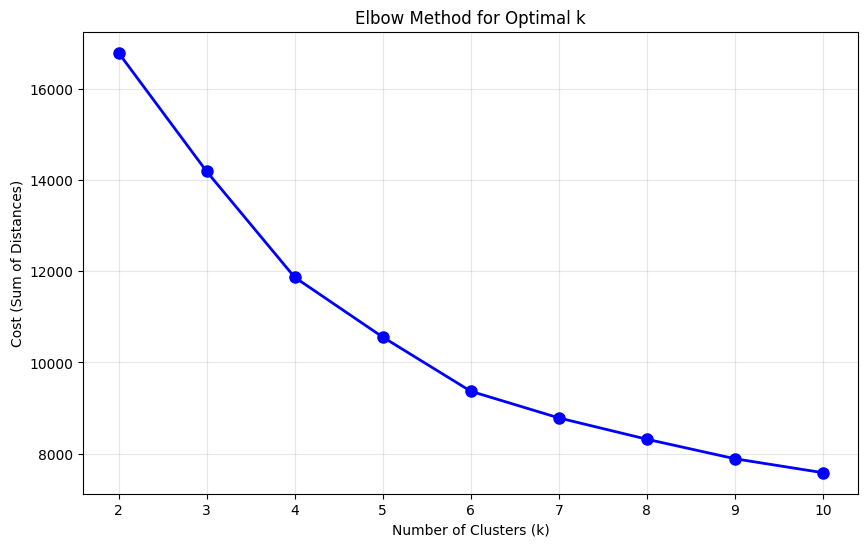

In [9]:
# Elbow method to find optimal k
costs = []
K_range = range(2, 11)

print("Running K-Prototypes for different values of k...")
for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_jobs=-1)
    kproto.fit(X, categorical=cat_indices)
    costs.append(kproto.cost_)
    print(f"  k={k}: cost = {kproto.cost_:.2f}")

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, costs, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Sum of Distances)')
plt.title('Elbow Method for Optimal k')
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.show()

---
## 4. Fit K-Prototypes Model

Based on the elbow plot, select an appropriate number of clusters. A common choice is where the curve starts to flatten (the "elbow").

In [10]:
# Select number of clusters based on elbow analysis
n_clusters = 5  # Adjust based on elbow plot

# Fit final model
print(f"Fitting K-Prototypes with k={n_clusters}...")
kproto_final = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42, n_jobs=-1)
clusters = kproto_final.fit_predict(X, categorical=cat_indices)

# Add cluster labels to dataframe
df_cluster['Cluster'] = clusters

print(f"\nCluster distribution:")
print(df_cluster['Cluster'].value_counts().sort_index())

Fitting K-Prototypes with k=5...

Cluster distribution:
Cluster
0    1479
1     493
2    1255
3    1973
4     530
Name: count, dtype: int64


---
## 5. Cluster Analysis

In [11]:
# Cluster centroids analysis
print("Cluster Centroids Analysis:")
print("="*70)

# The centroids structure: list of arrays, one per cluster
# Each cluster array contains [numerical_values..., categorical_values...]
centroids = kproto_final.cluster_centroids_
print(f"\nNumber of clusters: {len(centroids)}")
print(f"Features per cluster: {len(centroids[0])}")

# Build centroids DataFrame - each row is a cluster
all_features = num_features + cat_features
centroids_df = pd.DataFrame(
    centroids,
    columns=all_features,
    index=[f"Cluster {i}" for i in range(n_clusters)]
)

# Display numerical centroids (scaled values)
print("\n" + "-"*70)
print("Numerical Feature Centroids (scaled values):")
print("-"*70)
print(centroids_df[num_features].round(3))

# Display categorical centroids (modes)
print("\n" + "-"*70)
print("Categorical Feature Modes (most common value per cluster):")
print("-"*70)
print(centroids_df[cat_features])

Cluster Centroids Analysis:

Number of clusters: 5
Features per cluster: 6

----------------------------------------------------------------------
Numerical Feature Centroids (scaled values):
----------------------------------------------------------------------
                      yearbuilt   Avg_AirTemp_Annual               log_sqm
Cluster 0    0.5212528078124956   1.2449700531292962    0.5168800145146677
Cluster 1    -2.376045946532941  -0.4449525295598247  -0.19758949874983228
Cluster 2  0.014031256828435167   -0.587233490118374   -0.8275677764758644
Cluster 3   0.04775292257285232  -0.7508694329551937    0.6401068018053095
Cluster 4    0.5445886893021527   1.1254609619130007   -1.6818624133362081

----------------------------------------------------------------------
Categorical Feature Modes (most common value per cluster):
----------------------------------------------------------------------
                       primaryspaceusage                    region  \
Cluster 0      

In [12]:
# Unscale numerical centroids for interpretation
# Extract numerical features from centroids (first len(num_features) columns)
num_centroids_scaled = centroids_df[num_features].values.astype(float)

num_centroids_unscaled = pd.DataFrame(
    scaler.inverse_transform(num_centroids_scaled),
    columns=num_features,
    index=[f"Cluster {i}" for i in range(n_clusters)]
)

print("Numerical feature centroids (original scale):")
print(num_centroids_unscaled.round(2))

Numerical feature centroids (original scale):
           yearbuilt  Avg_AirTemp_Annual  log_sqm
Cluster 0    1979.34               22.77     9.18
Cluster 1    1919.79               13.09     8.33
Cluster 2    1968.91               12.27     7.58
Cluster 3    1969.61               11.34     9.33
Cluster 4    1979.82               22.08     6.57


In [13]:
# Combine centroids for summary table
cat_centroids_unscaled = centroids_df[cat_features]
cluster_summary = pd.concat([num_centroids_unscaled, cat_centroids_unscaled], axis=1)
cluster_summary['Count'] = df_cluster['Cluster'].value_counts().sort_index().values
cluster_summary['Pct'] = (cluster_summary['Count'] / len(df_cluster) * 100).round(1)

print("\n" + "="*90)
print("CLUSTER SUMMARY")
print("="*90)
print(cluster_summary.to_string())


CLUSTER SUMMARY
             yearbuilt  Avg_AirTemp_Annual   log_sqm              primaryspaceusage                    region        meter  Count   Pct
Cluster 0  1979.337390           22.766335  9.184985                      Education             Austin, Texas  electricity   1479  25.8
Cluster 1  1919.793103           13.087998  8.334033                      Education  Town of Ithaca, New York  electricity    493   8.6
Cluster 2  1968.913147           12.273142  7.583712                      Education    Cardiff, Cymru / Wales  electricity   1255  21.9
Cluster 3  1969.606183           11.335984  9.331751                      Education    Minneapolis, Minnesota  electricity   1973  34.4
Cluster 4  1979.816981           22.081896  6.566225  Entertainment/public assembly          Orlando, Florida  electricity    530   9.2


---
## 6. Cluster Visualization

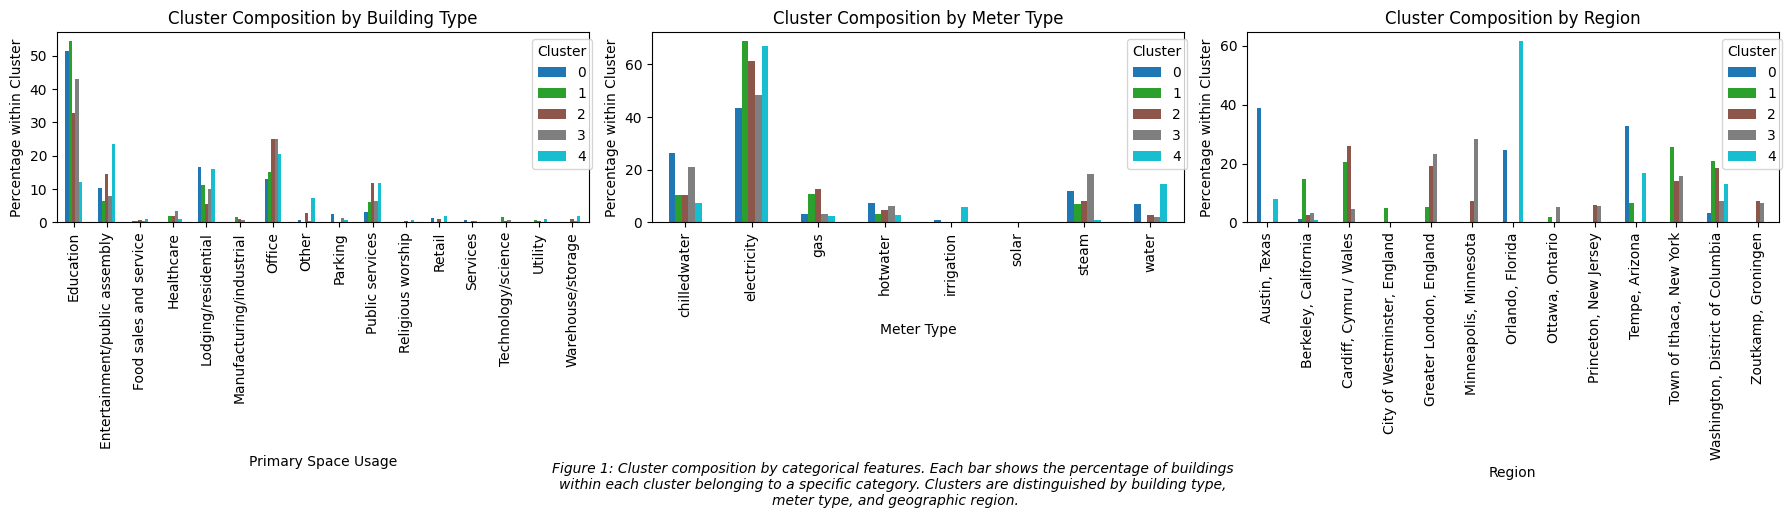

In [14]:
# Restore original scale for visualization (only the scaled features)
df_viz = df_cluster.copy()
df_viz[num_features] = scaler.inverse_transform(df_cluster[num_features])

# Distribution of clusters by building type
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# By primaryspaceusage
ct1 = pd.crosstab(df_viz['primaryspaceusage'], df_viz['Cluster'], normalize='columns') * 100
ct1.plot(kind='bar', ax=axes[0], colormap='tab10')
axes[0].set_title('Cluster Composition by Building Type')
axes[0].set_xlabel('Primary Space Usage')
axes[0].set_ylabel('Percentage within Cluster')
axes[0].legend(title='Cluster', bbox_to_anchor=(1.02, 1))
axes[0].tick_params(axis='x', rotation=90)

# By meter type
ct2 = pd.crosstab(df_viz['meter'], df_viz['Cluster'], normalize='columns') * 100
ct2.plot(kind='bar', ax=axes[1], colormap='tab10')
axes[1].set_title('Cluster Composition by Meter Type')
axes[1].set_xlabel('Meter Type')
axes[1].set_ylabel('Percentage within Cluster')
axes[1].legend(title='Cluster', bbox_to_anchor=(1.02, 1))
axes[1].tick_params(axis='x', rotation=90)

# By region
ct3 = pd.crosstab(df_viz['region'], df_viz['Cluster'], normalize='columns') * 100
ct3.plot(kind='bar', ax=axes[2], colormap='tab10')
axes[2].set_title('Cluster Composition by Region')
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Percentage within Cluster')
axes[2].legend(title='Cluster', bbox_to_anchor=(1.02, 1))
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()

# Add figure caption
fig.text(0.5, -0.02, 
         'Figure 1: Cluster composition by categorical features. Each bar shows the percentage of buildings \n'
         'within each cluster belonging to a specific category. Clusters are distinguished by building type, \n'
         'meter type, and geographic region.',
         ha='center', fontsize=10, style='italic')

plt.show()

### Figure 1 Interpretation: Cluster Composition by Categorical Features

**Building Type (Primary Space Usage):**
- **Clusters 0 and 4** are dominated by **educational buildings**, indicating these clusters capture school/university archetypes
- Other clusters show more diverse building type distributions, with **office and entertainment buildings** being the next most common primary space usages

**Meter Type:**
- **Electricity is the dominant meter type across all clusters**, reflecting that most buildings in the dataset primarily report electrical energy consumption
- Some clusters show secondary presence of chilled water or gas meters, but electricity consistently dominates

**Geographic Region:**
- **Clusters are typically spread across several regions** rather than being geographically isolated
- This suggests the clustering algorithm groups buildings by characteristics (type, age, climate, size) that transcend geographic boundaries
- Some clusters may show stronger regional concentration where local building practices or climate conditions create distinct archetypes

**Key Insight:** The clusters appear to capture meaningful building archetypes that combine multiple characteristics rather than simply grouping by a single dominant feature.

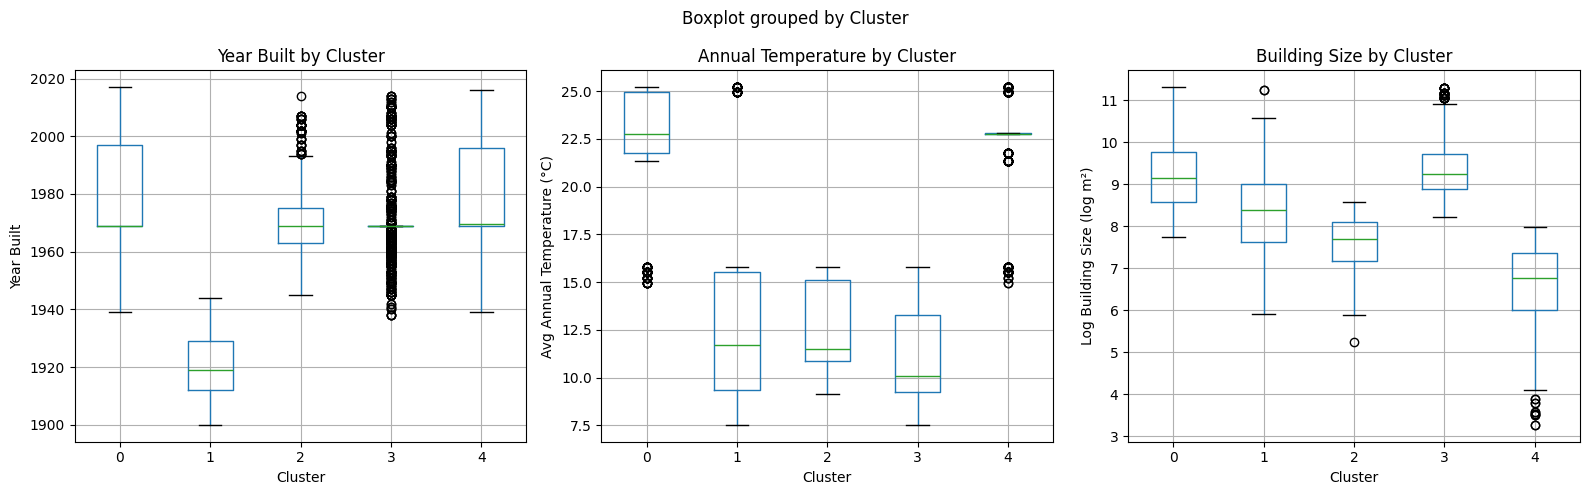

In [15]:
# Numerical feature distributions by cluster
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Year built by cluster
df_viz.boxplot(column='yearbuilt', by='Cluster', ax=axes[0])
axes[0].set_title('Year Built by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Year Built')
plt.suptitle('')  # Remove automatic title

# Temperature by cluster
df_viz.boxplot(column='Avg_AirTemp_Annual', by='Cluster', ax=axes[1])
axes[1].set_title('Annual Temperature by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Avg Annual Temperature (°C)')

# Building size by cluster
df_viz.boxplot(column='log_sqm', by='Cluster', ax=axes[2])
axes[2].set_title('Building Size by Cluster')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Log Building Size (log m²)')

plt.tight_layout()
plt.show()

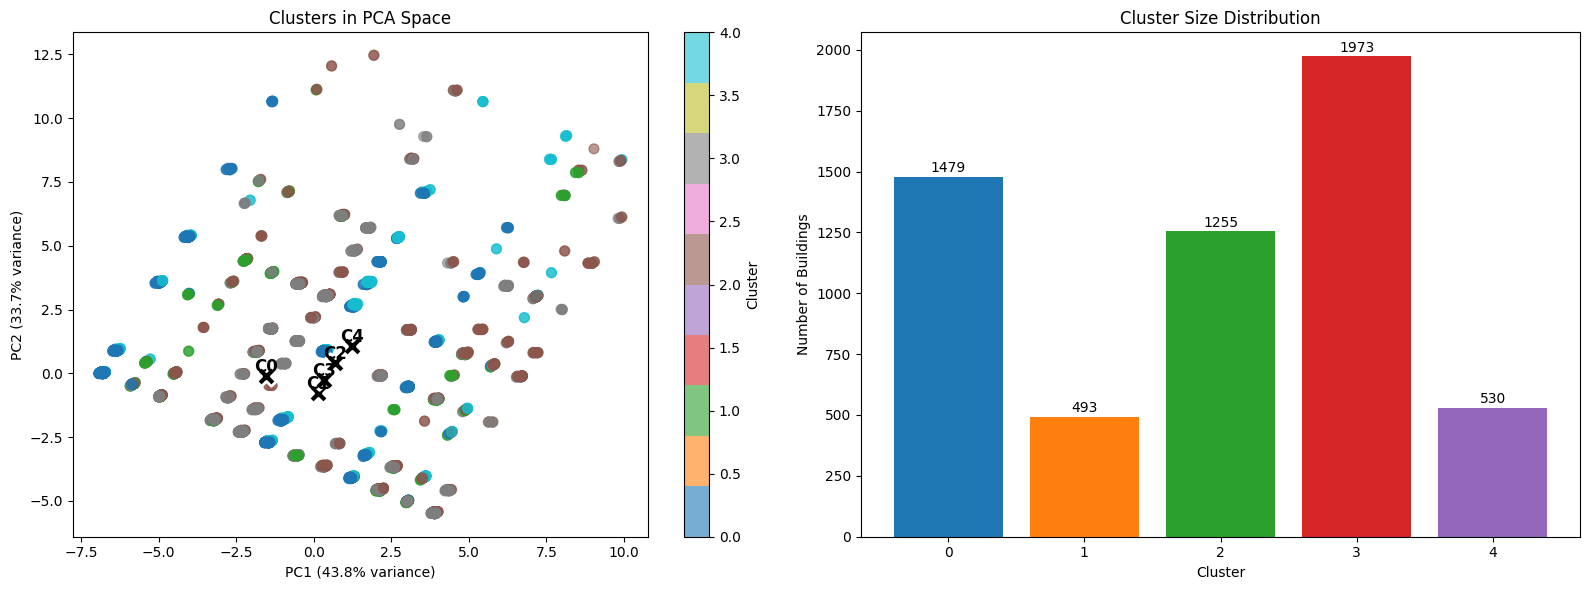


PCA Explained Variance: 77.5% (2 components)


In [16]:
# Advanced Cluster Visualization using PCA for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Prepare data for PCA visualization
# Encode categorical variables for PCA
df_encoded = df_cluster.copy()
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# Combine numerical and encoded categorical features
X_for_pca = df_encoded[num_features + cat_features].values

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_for_pca)

# Create scatter plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Clusters in PCA space
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Cluster'], 
                          cmap='tab10', alpha=0.6, s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)')
axes[0].set_title('Clusters in PCA Space')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Cluster')

# Add cluster centroids to PCA plot
centroids_pca = []
for i in range(n_clusters):
    cluster_mask = df_cluster['Cluster'] == i
    centroid_pca = X_pca[cluster_mask].mean(axis=0)
    centroids_pca.append(centroid_pca)
    axes[0].scatter(centroid_pca[0], centroid_pca[1], c='black', marker='X', 
                   s=200, edgecolors='white', linewidths=2)
    axes[0].annotate(f'C{i}', (centroid_pca[0], centroid_pca[1]), 
                    fontsize=12, fontweight='bold', ha='center', va='bottom')

# Plot 2: Cluster sizes
cluster_counts = df_cluster['Cluster'].value_counts().sort_index()
colors = plt.cm.tab10(range(n_clusters))
bars = axes[1].bar(cluster_counts.index, cluster_counts.values, color=colors)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Buildings')
axes[1].set_title('Cluster Size Distribution')
axes[1].set_xticks(range(n_clusters))

# Add value labels on bars
for bar, count in zip(bars, cluster_counts.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nPCA Explained Variance: {pca.explained_variance_ratio_.sum()*100:.1f}% (2 components)")

Running t-SNE (this may take a moment)...


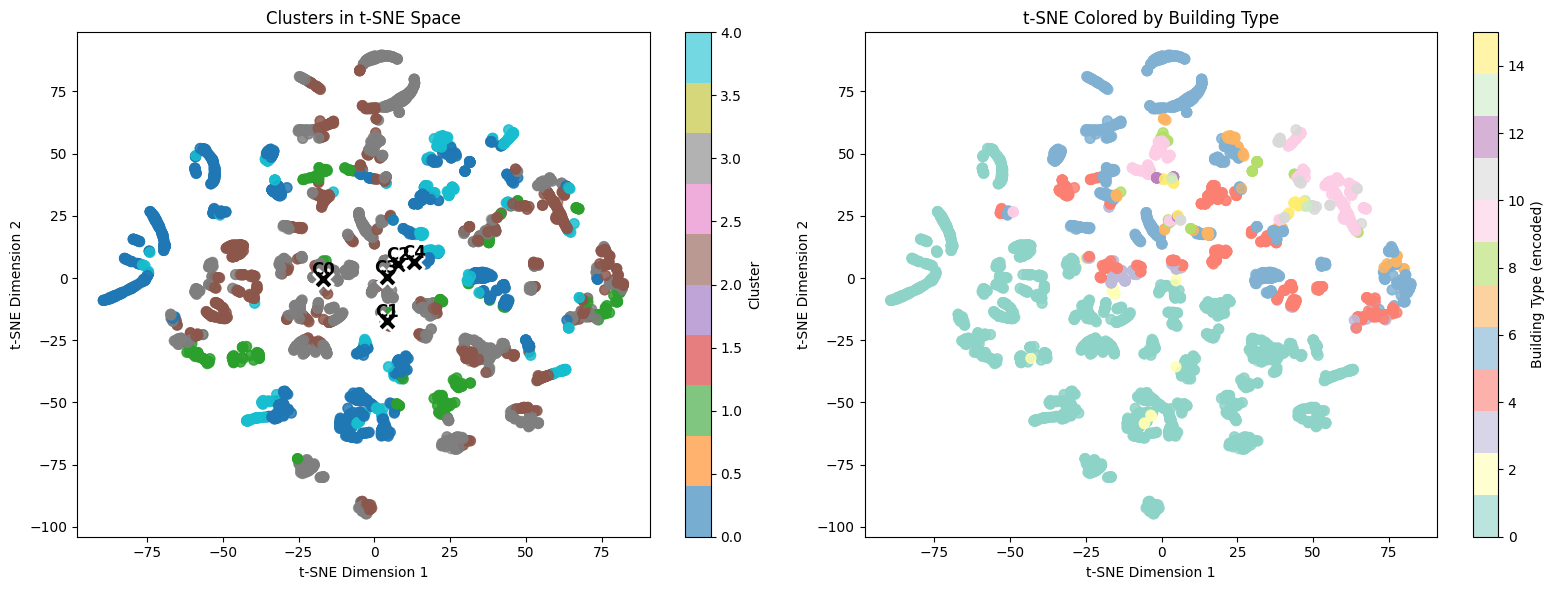


t-SNE preserves local neighborhood structure better than PCA,
   making cluster separation more visible for mixed categorical/numerical data.


In [30]:
# Alternative visualization: t-SNE for better cluster separation
# t-SNE is better at preserving local structure and showing cluster separation
from sklearn.manifold import TSNE

print("Running t-SNE (this may take a moment)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_for_pca)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: t-SNE visualization
scatter = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_cluster['Cluster'], 
                          cmap='tab10', alpha=0.6, s=50)
axes[0].set_xlabel('t-SNE Dimension 1')
axes[0].set_ylabel('t-SNE Dimension 2')
axes[0].set_title('Clusters in t-SNE Space')
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Cluster')

# Add cluster centroids to t-SNE plot
for i in range(n_clusters):
    cluster_mask = df_cluster['Cluster'] == i
    centroid_tsne = X_tsne[cluster_mask].mean(axis=0)
    axes[0].scatter(centroid_tsne[0], centroid_tsne[1], c='black', marker='X', 
                   s=200, edgecolors='white', linewidths=2)
    axes[0].annotate(f'C{i}', (centroid_tsne[0], centroid_tsne[1]), 
                    fontsize=12, fontweight='bold', ha='center', va='bottom')

# Plot 2: Comparison - color by building type to show how clusters capture it
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], 
                           c=df_encoded['primaryspaceusage'], 
                           cmap='Set3', alpha=0.6, s=50)
axes[1].set_xlabel('t-SNE Dimension 1')
axes[1].set_ylabel('t-SNE Dimension 2')
axes[1].set_title('t-SNE Colored by Building Type')
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Building Type (encoded)')

plt.tight_layout()
plt.show()

print("\nt-SNE preserves local neighborhood structure better than PCA,")
print("   making cluster separation more visible for mixed categorical/numerical data.")

### Why PCA Shows Centroids Close Together

**The PCA visualization limitation:** PCA projects data onto directions of maximum *numerical* variance, but K-Prototypes clusters are formed using:
- **Euclidean distance** for numerical features
- **Hamming distance** (simple matching) for categorical features

When categorical features are label-encoded for PCA, they lose their true distance meaning. A building type encoded as "2" vs "5" appears numerically close, but in K-Prototypes they are completely different categories.

**t-SNE provides a better view** because it:
1. Preserves local neighborhood structure rather than global variance
2. Groups points that are similar in the high-dimensional space together
3. Better reveals cluster separation that exists in the original mixed feature space

**Key insight:** If clusters look well-separated in t-SNE but not in PCA, the clustering is working correctly—the separation is just in dimensions that PCA doesn't capture well.

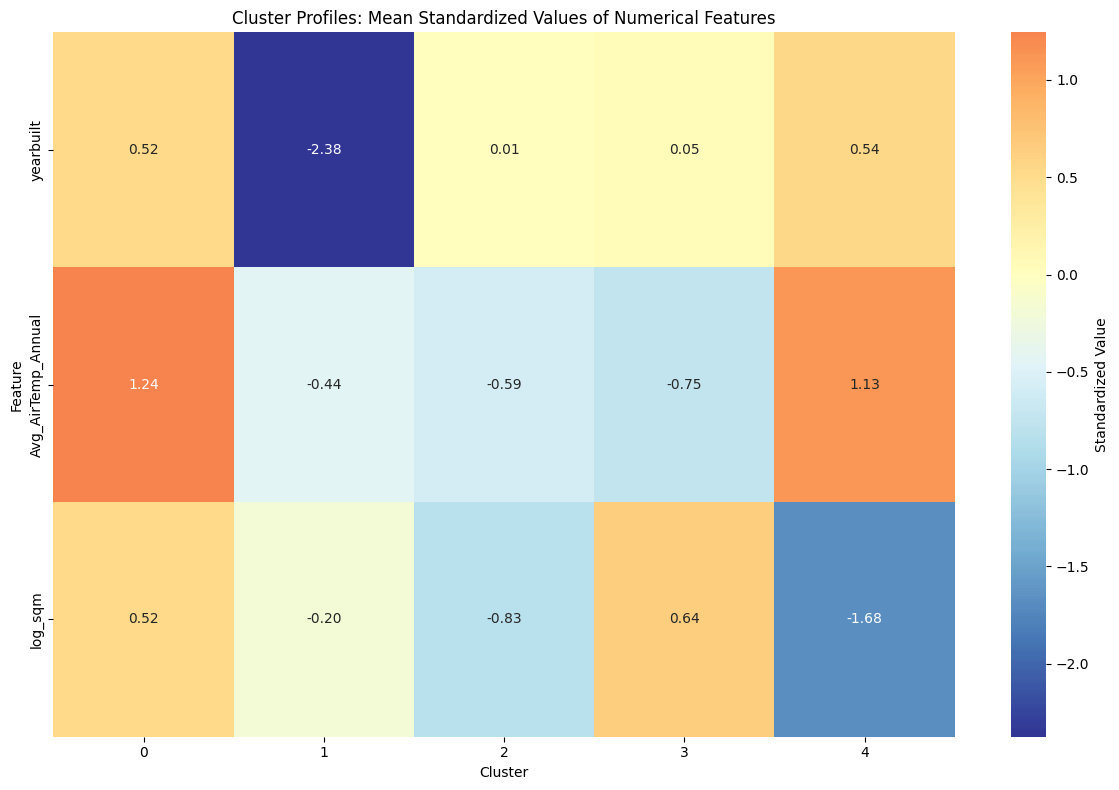

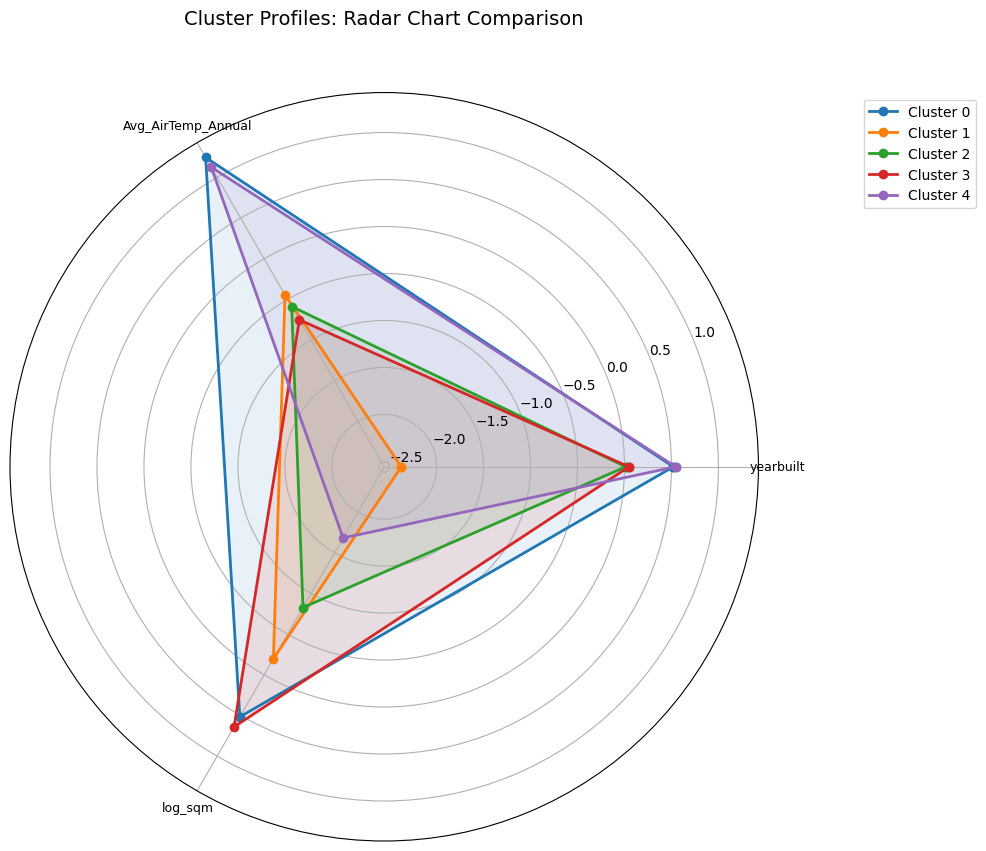

In [17]:
# Heatmap of cluster characteristics
fig, ax = plt.subplots(figsize=(12, 8))

# Calculate mean values for numerical features per cluster (scaled values)
cluster_profiles = df_cluster.groupby('Cluster')[num_features].mean()

# Create heatmap
sns.heatmap(cluster_profiles.T, annot=True, fmt='.2f', cmap='RdYlBu_r', 
            center=0, ax=ax, cbar_kws={'label': 'Standardized Value'})
ax.set_title('Cluster Profiles: Mean Standardized Values of Numerical Features')
ax.set_xlabel('Cluster')
ax.set_ylabel('Feature')

plt.tight_layout()
plt.show()

# Radar/Spider chart for cluster comparison
from math import pi

# Prepare data for radar chart
categories = num_features
N = len(categories)

# Create angle for each feature
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

colors = plt.cm.tab10(range(n_clusters))
for i in range(n_clusters):
    values = cluster_profiles.loc[i].values.flatten().tolist()
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i}', color=colors[i])
    ax.fill(angles, values, alpha=0.1, color=colors[i])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=9)
ax.set_title('Cluster Profiles: Radar Chart Comparison', size=14, y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

### Heatmap Interpretation

The heatmap displays the **mean standardized values of numerical features for each cluster**.

**How to read it:**
- **Rows**: The three numerical clustering features (`yearbuilt`, `Avg_AirTemp_Annual`, `log_sqm`)
- **Columns**: Each cluster (0, 1, 2, 3, 4)
- **Colors**: 
  - **Red/warm colors** = values **above** the overall mean (positive z-scores)
  - **Blue/cool colors** = values **below** the overall mean (negative z-scores)
  - **White/neutral** = close to the overall mean (near zero)

**What each feature tells you about a cluster:**
| Feature | Negative (Blue) | Positive (Red) |
|---------|-----------------|----------------|
| `yearbuilt` | Older buildings | Newer buildings |
| `Avg_AirTemp_Annual` | Cooler climates | Warmer climates |
| `log_sqm` | Smaller buildings | Larger buildings |

This visualization provides a quick summary of what makes each cluster distinct in terms of numerical characteristics.

---
## 7. EUI Analysis Within Clusters

Since clustering is based on building characteristics only (excluding EUI), we can now analyze how energy intensity varies **within** each peer group. This is the key benefit of this approach for benchmarking.

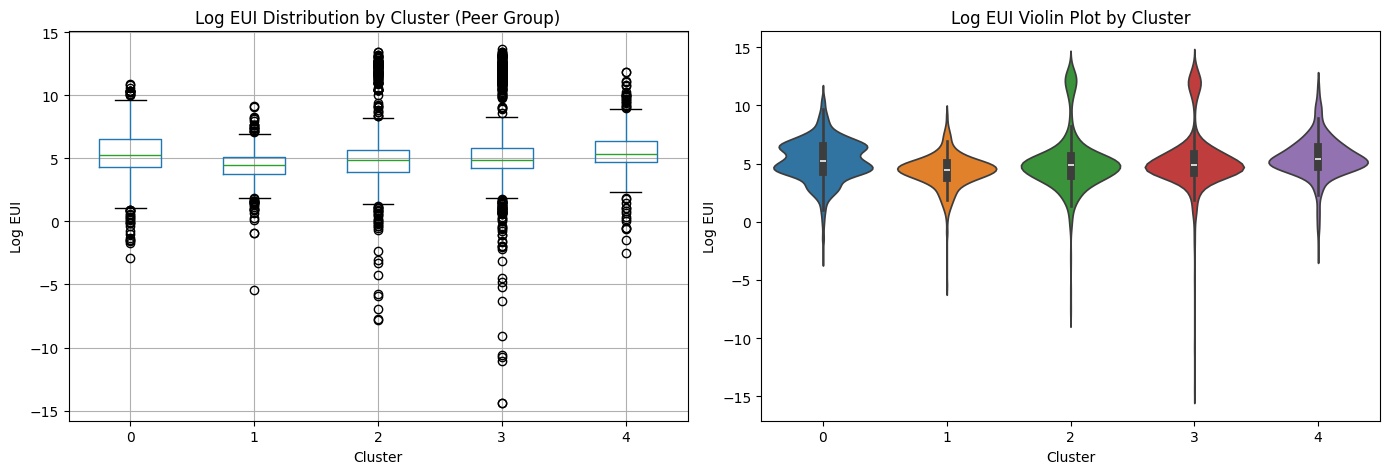


EUI STATISTICS WITHIN EACH CLUSTER (PEER GROUP)
         Count  Mean   Std    Min  Median    Max
Cluster                                         
0         1479  5.30  1.80  -2.93    5.23  10.90
1          493  4.38  1.42  -5.45    4.47   9.16
2         1255  5.10  2.57  -7.78    4.84  13.45
3         1973  5.34  2.68 -14.40    4.89  13.66
4          530  5.52  1.76  -2.53    5.35  11.85


In [18]:
# EUI distribution within each cluster
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot of EUI by cluster
df_viz.boxplot(column='log_eui', by='Cluster', ax=axes[0])
axes[0].set_title('Log EUI Distribution by Cluster (Peer Group)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Log EUI')
plt.suptitle('')

# Violin plot for more detail
import seaborn as sns
sns.violinplot(data=df_viz, x='Cluster', y='log_eui', ax=axes[1], palette='tab10')
axes[1].set_title('Log EUI Violin Plot by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log EUI')

plt.tight_layout()
plt.show()

# Summary statistics of EUI within each cluster
print("\n" + "="*80)
print("EUI STATISTICS WITHIN EACH CLUSTER (PEER GROUP)")
print("="*80)
eui_stats = df_viz.groupby('Cluster')['log_eui'].agg(['count', 'mean', 'std', 'min', 'median', 'max'])
eui_stats.columns = ['Count', 'Mean', 'Std', 'Min', 'Median', 'Max']
print(eui_stats.round(2))

In [19]:
# Identify efficiency outliers within each cluster
# Buildings with EUI > 1 std above cluster mean are "underperformers"
# Buildings with EUI < 1 std below cluster mean are "top performers"

df_viz['cluster_mean_eui'] = df_viz.groupby('Cluster')['log_eui'].transform('mean')
df_viz['cluster_std_eui'] = df_viz.groupby('Cluster')['log_eui'].transform('std')
df_viz['eui_zscore'] = (df_viz['log_eui'] - df_viz['cluster_mean_eui']) / df_viz['cluster_std_eui']

# Classify buildings
df_viz['efficiency_status'] = pd.cut(
    df_viz['eui_zscore'],
    bins=[-np.inf, -1, 1, np.inf],
    labels=['Top Performer', 'Average', 'Underperformer']
)

print("="*70)
print("EFFICIENCY CLASSIFICATION WITHIN PEER GROUPS")
print("="*70)
print("\nBuildings are compared to their cluster peers:")
print("- Top Performer: EUI > 1 std below cluster mean")
print("- Average: Within 1 std of cluster mean")
print("- Underperformer: EUI > 1 std above cluster mean")

# Summary by cluster
print("\n" + "-"*70)
efficiency_summary = pd.crosstab(df_viz['Cluster'], df_viz['efficiency_status'], margins=True)
print(efficiency_summary)

# Percentage breakdown
print("\n" + "-"*70)
print("Percentage breakdown:")
efficiency_pct = pd.crosstab(df_viz['Cluster'], df_viz['efficiency_status'], normalize='index') * 100
print(efficiency_pct.round(1))

EFFICIENCY CLASSIFICATION WITHIN PEER GROUPS

Buildings are compared to their cluster peers:
- Top Performer: EUI > 1 std below cluster mean
- Average: Within 1 std of cluster mean
- Underperformer: EUI > 1 std above cluster mean

----------------------------------------------------------------------
efficiency_status  Top Performer  Average  Underperformer   All
Cluster                                                        
0                            208     1071             200  1479
1                             58      386              49   493
2                            100     1036             119  1255
3                            112     1664             197  1973
4                             42      422              66   530
All                          520     4579             631  5730

----------------------------------------------------------------------
Percentage breakdown:
efficiency_status  Top Performer  Average  Underperformer
Cluster                           

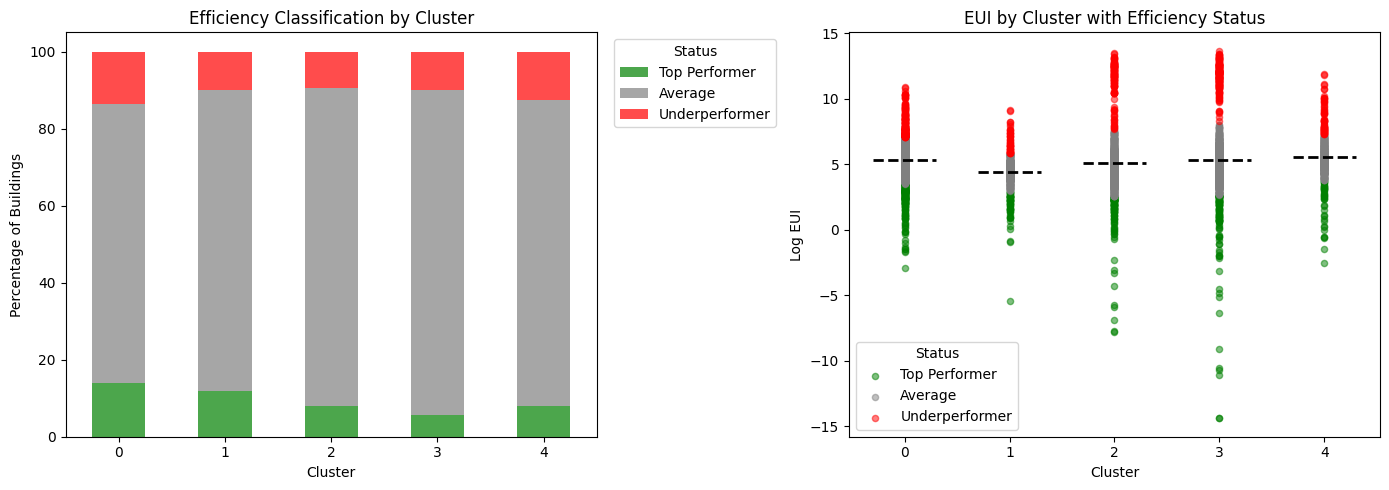

In [20]:
# Visualize efficiency classification
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart of efficiency status by cluster
efficiency_pct.plot(kind='bar', stacked=True, ax=axes[0], 
                    color=['green', 'gray', 'red'], alpha=0.7)
axes[0].set_title('Efficiency Classification by Cluster')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Percentage of Buildings')
axes[0].legend(title='Status', bbox_to_anchor=(1.02, 1))
axes[0].tick_params(axis='x', rotation=0)

# Scatter plot: EUI vs cluster with color by efficiency status
colors = {'Top Performer': 'green', 'Average': 'gray', 'Underperformer': 'red'}
for status, color in colors.items():
    subset = df_viz[df_viz['efficiency_status'] == status]
    axes[1].scatter(subset['Cluster'], subset['log_eui'], 
                   c=color, label=status, alpha=0.5, s=20)

# Add cluster mean lines
for cluster in range(n_clusters):
    cluster_mean = df_viz[df_viz['Cluster'] == cluster]['log_eui'].mean()
    axes[1].hlines(cluster_mean, cluster - 0.3, cluster + 0.3, 
                  colors='black', linewidth=2, linestyles='--')

axes[1].set_title('EUI by Cluster with Efficiency Status')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Log EUI')
axes[1].legend(title='Status')

plt.tight_layout()
plt.show()

---
## 8. Cluster Profiles

Detailed profiles for each cluster showing building characteristics and EUI patterns.

In [21]:
# Generate detailed cluster profiles with EUI analysis
print("="*80)
print("CLUSTER PROFILES (PEER GROUPS)")
print("="*80)

for i in range(n_clusters):
    cluster_data = df_viz[df_viz['Cluster'] == i]
    
    print(f"\n{'='*80}")
    print(f"CLUSTER {i}: {len(cluster_data)} buildings ({len(cluster_data)/len(df_viz)*100:.1f}%)")
    print("="*80)
    
    # Building characteristics
    print("\n📋 BUILDING CHARACTERISTICS:")
    top_usage = cluster_data['primaryspaceusage'].value_counts().head(3)
    print(f"   Top building types: {', '.join(top_usage.index.tolist())}")
    
    top_meter = cluster_data['meter'].value_counts().head(3)
    print(f"   Top meter types: {', '.join(top_meter.index.tolist())}")
    
    top_region = cluster_data['region'].value_counts().head(2)
    print(f"   Top regions: {', '.join(top_region.index.tolist())}")
    
    print(f"   Avg Year Built: {cluster_data['yearbuilt'].mean():.0f}")
    print(f"   Avg Temperature: {cluster_data['Avg_AirTemp_Annual'].mean():.1f}°C")
    
    # EUI analysis within cluster
    print("\n⚡ EUI ANALYSIS (within this peer group):")
    print(f"   Mean Log EUI: {cluster_data['log_eui'].mean():.2f}")
    print(f"   Std Log EUI: {cluster_data['log_eui'].std():.2f}")
    print(f"   Range: {cluster_data['log_eui'].min():.2f} to {cluster_data['log_eui'].max():.2f}")
    
    # Efficiency breakdown
    eff_counts = cluster_data['efficiency_status'].value_counts()
    print("\n🎯 EFFICIENCY BREAKDOWN:")
    for status in ['Top Performer', 'Average', 'Underperformer']:
        count = eff_counts.get(status, 0)
        pct = count / len(cluster_data) * 100
        print(f"   {status}: {count} buildings ({pct:.1f}%)")

CLUSTER PROFILES (PEER GROUPS)

CLUSTER 0: 1479 buildings (25.8%)

📋 BUILDING CHARACTERISTICS:
   Top building types: Education, Lodging/residential, Office
   Top meter types: electricity, chilledwater, steam
   Top regions: Austin, Texas, Tempe, Arizona
   Avg Year Built: 1979
   Avg Temperature: 22.8°C

⚡ EUI ANALYSIS (within this peer group):
   Mean Log EUI: 5.30
   Std Log EUI: 1.80
   Range: -2.93 to 10.90

🎯 EFFICIENCY BREAKDOWN:
   Top Performer: 208 buildings (14.1%)
   Average: 1071 buildings (72.4%)
   Underperformer: 200 buildings (13.5%)

CLUSTER 1: 493 buildings (8.6%)

📋 BUILDING CHARACTERISTICS:
   Top building types: Education, Office, Lodging/residential
   Top meter types: electricity, gas, chilledwater
   Top regions: Town of Ithaca, New York, Washington, District of Columbia
   Avg Year Built: 1920
   Avg Temperature: 13.1°C

⚡ EUI ANALYSIS (within this peer group):
   Mean Log EUI: 4.38
   Std Log EUI: 1.42
   Range: -5.45 to 9.16

🎯 EFFICIENCY BREAKDOWN:
   Top 

---
## 8. Save Results

In [28]:
# Add cluster labels and efficiency status to original dataframe and save
df_with_clusters = df.copy()

# Need to align indices - only rows without missing values have clusters
df_with_clusters = df_with_clusters.dropna(subset=cat_features + num_features + ['log_eui'])
df_with_clusters['Cluster'] = clusters
df_with_clusters['efficiency_status'] = df_viz['efficiency_status'].values
df_with_clusters['eui_zscore'] = df_viz['eui_zscore'].values

# Save to CSV
output_path = "../data/df_analysis_with_clusters.csv"
df_with_clusters.to_csv(output_path, index=False)
print(f"Data with cluster labels and efficiency status saved to: {output_path}")
print(f"Total rows: {len(df_with_clusters)}")

# Summary of saved data
print("\n" + "-"*50)
print("Columns saved:")
print(df_with_clusters.columns.tolist())


Data with cluster labels and efficiency status saved to: ../data/df_analysis_with_clusters.csv
Total rows: 5730

--------------------------------------------------
Columns saved:
['building_id', 'year', 'meter', 'total_meter_reading', 'site_id', 'sqm', 'primaryspaceusage', 'yearbuilt', 'region', 'country', 'Avg_AirTemp_Annual', 'Total_HDD_Annual', 'Total_CDD_Annual', 'Count_Heating_Days_Annual', 'Count_Cooling_Days_Annual', 'eui', 'log_eui', 'log_sqm', 'Cluster', 'efficiency_status', 'eui_zscore']


---
## Summary

### Approach: Characteristic-Based Clustering (with Building Size)

K-Prototypes clustering on **building characteristics only** (excluding EUI):

**Clustering Features:**
- Building type (`primaryspaceusage`)
- Energy source (`meter`)
- Geographic location (`region`)
- Building age (`yearbuilt`)
- Climate (`Avg_AirTemp_Annual`)
- **Building size (`log_sqm`)** 

**Analysis Feature (NOT used for clustering):**
- Energy intensity (`log_eui`)

---

## Key Findings

### 1. Peer Groups Identified

Clusters are formed based on building type, region, climate, age, and **size from metadata**.

### 2. EUI Analysis Within Peer Groups

Building size is independent of energy data, so EUI analysis within clusters provides unbiased benchmarking.

### 3. Efficiency Classification

Buildings are classified as:
- **Top Performer**: EUI > 1 std below cluster mean
- **Average**: Within 1 std of cluster mean  
- **Underperformer**: EUI > 1 std above cluster mean

### 4. Practical Applications

| Application | How It Works |
|-------------|--------------|
| **Size-Fair Benchmarking** | Small buildings compared to small buildings |
| **Efficiency Scoring** | Z-score based on peer group performance |
| **Target Identification** | Focus on underperformers within their peer group |
| **Portfolio Segmentation** | Group by size + type + climate |

---

## Output Files

- **`df_analysis_with_clusters.csv`**: Original data with cluster labels, efficiency status, z-scores, and building size (`sqm`, `log_sqm`) added